# Modelo Support Vector Machine
## Liceth Mosquera

In [2]:
Data = pd.read_excel('Data.xlsx')
Data = Data.set_index('Date')
df1 = Data.dropna(axis=0,how='any')
Y = df1['Class']
X = df1.drop('Class', axis = 1)
df1.groupby('Class').size()

Class
-1    1111
 0    2001
 1     963
dtype: int64

### $\eta$ minimo estimado

In [3]:
# Binarize the output
y = label_binarize(Y, classes=[-1, 0, 1])
n_classes = y.shape[1]
n_classes
X.shape[1]

67

SVM con Kernel rbf

In [4]:
classifier = SVC(kernel="rbf",gamma='scale')
classifier.fit(X,np.ravel(Y))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Modelo 2 separando 70% para entrenamiento

In [97]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 60% training and 40% test

In [6]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Linear Kernel

Dividiendo las clases

In [96]:
Xb_tr, X2_o, Yb_tr, y2_o = train_test_split(X, y,test_size=0.3,random_state=19)
Xb_va2, Xb_test2, Yb_va2, Yb_test2 = train_test_split(X2_o, y2_o, test_size=0.5, train_size = 0.5, random_state=19)  

In [15]:
clf = OneVsRestClassifier(svm.SVC(kernel='rbf',gamma='scale', probability=True))
y_score = clf.fit(Xb_tr, Yb_tr).decision_function(X2_o)
y_pred = clf.predict(X2_o)
Y_proba = clf.predict_proba(X2_o)
score=clf.score(X2_o, y_pred)

https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel
Conf_Mat = multilabel_confusion_matrix(y_test,Y_pred,labels=[-1,0,1])

https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case

In [17]:
print ('Accuracy:', accuracy_score(y2_o, y_pred))
print ('F1 score:', f1_score(y2_o, y_pred, average='macro'))
print ('Recall:', recall_score(y2_o, y_pred, average='macro'))
print ('Precision:', precision_score(y2_o, y_pred, average='macro'))
print ('\n clasification report:\n', classification_report(y2_o,y_pred))

Accuracy: 0.31643499591169255
F1 score: 0.23350674520487277
Recall: 0.2149712667579251
Precision: 0.7865214431586113

 clasification report:
               precision    recall  f1-score   support

           0       0.69      0.03      0.05       316
           1       0.67      0.61      0.64       615
           2       1.00      0.00      0.01       292

   micro avg       0.67      0.32      0.43      1223
   macro avg       0.79      0.21      0.23      1223
weighted avg       0.75      0.32      0.34      1223
 samples avg       0.32      0.32      0.32      1223



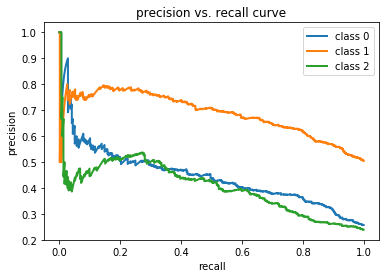

In [21]:
# precision recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y2_o[:, i],y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

https://www.programcreek.com/python/example/94869/sklearn.multiclass.OneVsRestClassifier

In [23]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y2_o[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y2_o.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

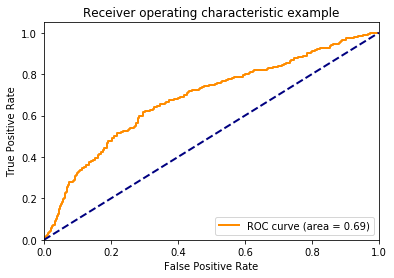

In [24]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Graficar ROC por clases

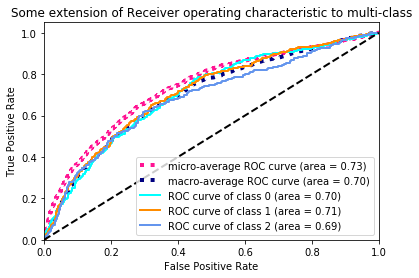

In [25]:
#Compute macro-average ROC curve and ROC area

# Primero agregamos la tasa de todos los falsos positivos
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

#despues interpolamos todas las curvas ROC en este punto
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finalmente lo promediamos y computamos AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Iterando la cantidad de datos

https://relopezbriega.github.io/blog/2016/05/29/machine-learning-con-python-sobreajuste/ quitar vf
https://stackoverflow.com/questions/51378105/plot-multi-class-roc-curve-for-decisiontreeclassifier
https://www.coursera.org/lecture/clasificacion-imagenes/support-vector-machines-svm-cuestiones-practicas-d8ECB

In [27]:
Epsilon = 0.2 #error real
delta = 0.1  #error de entrenamiento
VC_dim= len(list(df1))
n_est = int(np.ceil((1/Epsilon)*(np.log(VC_dim) + np.log(1/delta))))
n_est

33

In [28]:
step=1000
Pred=[np.zeros(len(X))]
Prob=np.zeros(int((len(X)*0.6)/step))
Conf_Mat= np.zeros((int((len(X)*0.6)/step),3,3))
accur=np.zeros(int((len(X)*0.6)/step))

R_rta=pd.DataFrame(accur,Conf_Mat)
R_rta.all()

num=list(range(len(accur)))
n=n_est
N=range(n,round(len(X)*0.6),step)
#Conf_Mat
precision = dict()
recall = dict()
average_precision = dict()

In [ ]:
(len(X)*0.6)/step

https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

# Comparando varios algoritmos

LR: 0.516387 (0.100475)
CART: 0.495050 (0.116576)
SVM: 0.503879 (0.110783)
RFC: 0.510002 (0.105541)


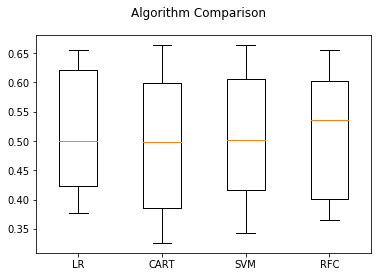

In [55]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC# prepare configuration for cross validation test harness
seed = 3
# prepare models
models = []
models.append(('LR', LogisticRegression(random_state=0, solver='newton-cg',multi_class='multinomial')))
models.append(('CART', DecisionTreeClassifier(max_depth = 3,min_samples_leaf= 6,random_state=seed)))
models.append(('SVM', SVC(kernel='linear', probability=True, decision_function_shape='ovr')))
models.append(('RFC', RandomForestClassifier(n_estimators=50,max_depth=3,random_state=seed)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

https://www.kaggle.com/s7uff3r/multiple-classifiers-accuracy-tests-roc-curves

Prueba aumentando la muestra

In [119]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=109) # 60% training and 40% test

In [120]:
clf = svm.SVC(kernel='linear')
# Train classifier 
clf.fit(x_train, y_train)

NameError: name 'plot_decision_function' is not defined

In [140]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
n_svm = np.zeros((int((len(X)*0.7)/step),3,3))
clf =svm.SVC(kernel='linear') #,gamma='scale' decision_function_shape='ovr' LinearSVC(random_state=0, tol=1e-5,multi_class='ovr')
for i in range(len(N)):
    Xb_tr, Xb_o, Yb_tr, Yb_o = train_test_split(x_train,y_train ,test_size=((N[i]/X.shape[0])*0.3/0.7)
                                                ,train_size=N[i]/X.shape[0],random_state=19)  
    #Xb_va, Xb_ts, Yb_va, Yb_ts = train_test_split(Xb_o, Yb_o, test_size=0.5, train_size = 0.5, random_state=19)
    
    #porbando el modelo
    y_score = clf.fit(Xb_tr, Yb_tr).decision_function(x_test)
    y_pred2= clf.predict(x_test)
   # Pred= score(clf,Xb_o, y_score)
    n_svm[i,i,i]=(clf.score(x_test, y_test)) #clf.decision_function([[1]])
 

IndexError: index 2 is out of bounds for axis 0 with size 2

In [135]:
max(n_svm)

(2, 2, 2)

In [136]:
n_bst = np.where(n_svm == np.amax(n_svm))[0]
n_bst

array([0], dtype=int64)

In [139]:
n_svm

array([[[0.27964023, 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.420278  , 0.        ],
        [0.        , 0.        , 0.        ]]])

In [ ]:
a = []
for i in range(0,285): #len(N)-1
    i=n+i*step
    a.append(i)
#print(a)

In [ ]:
plt.plot(a,n_svm)
plt.title('Accuracy', y=1.1)
plt.ylabel('Accuracy')
plt.xlabel('Cantidad datos')

In [94]:
from sklearn.model_selection import GridSearchCV # Grid Search
from sklearn import svm
# Parameter Grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}
 
# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose=1)
clf_grid.fit(Xb_tr, Yb_tr)

C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 22.3min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 1e-05, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

# ROC por clase

https://gtas.unican.es/files/docencia/APS/apuntes/07_svm_kernel.pdf

https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html#sphx-glr-auto-examples-calibration-plot-calibration-curve-py
   ROC para todos los modelos

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4,random_state=109) # 60% training and 40% test

In [35]:
smv=SVC(kernel='linear').fit(x_train, y_train)
smv_predicted=smv.predict( x_test)
confusion_mc=confusion_matrix(y_test,smv_predicted)
df_cm=pd.DataFrame(confusion_mc)

Text(0.5, 15.0, 'Predicted label')

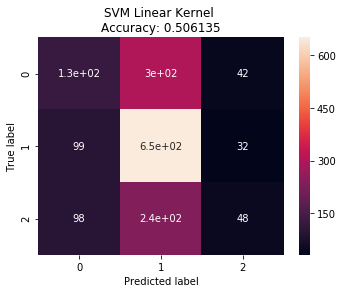

In [39]:
import seaborn as sns
plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm,annot=True)
plt.title('SVM Linear Kernel \nAccuracy: {0:3f}'.format(accuracy_score(y_test,smv_predicted)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [40]:
smv_rbf=SVC(kernel='rbf').fit(x_train, y_train)
smv_predicted_rbf=smv.predict( x_test)
confusion_mc_rbf=confusion_matrix(y_test,smv_predicted_rbf)
df_cm_rbf=pd.DataFrame(confusion_mc_rbf)

C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 15.0, 'Predicted label')

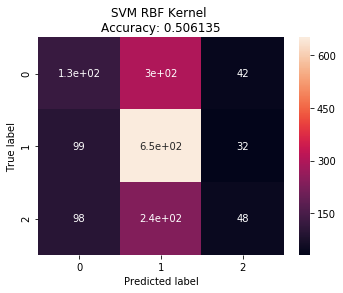

In [42]:
plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm_rbf,annot=True)
plt.title('SVM RBF Kernel \nAccuracy: {0:3f}'.format(accuracy_score(y_test,smv_predicted_rbf)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [44]:
print(classification_report(y_test,smv_predicted_rbf))

              precision    recall  f1-score   support

          -1       0.39      0.27      0.32       466
           0       0.55      0.83      0.66       782
           1       0.39      0.13      0.19       382

    accuracy                           0.51      1630
   macro avg       0.44      0.41      0.39      1630
weighted avg       0.47      0.51      0.45      1630



In [49]:
print('Micro-averaged precision _lineal={:.2f} (treat instances equally)'
      .format(precision_score(y_test,smv_predicted,average='micro')))
print('Macro-averaged precision _lineal={:.2f} (treat instances equally)'
      .format(precision_score(y_test,smv_predicted,average='macro')))
print('Micro-averaged precision RBF={:.2f} (treat instances equally)'
      .format(precision_score(y_test,smv_predicted_rbf,average='micro')))
print('Macro-averaged precision RBF={:.2f} (treat instances equally)'
      .format(precision_score(y_test,smv_predicted_rbf,average='macro')))

Micro-averaged precision _lineal=0.51 (treat instances equally)
Macro-averaged precision _lineal=0.44 (treat instances equally)
Micro-averaged precision RBF=0.51 (treat instances equally)
Macro-averaged precision RBF=0.44 (treat instances equally)


In [50]:
print('Micro-averaged precision _lineal={:.2f} (treat instances equally)'
      .format(f1_score(y_test,smv_predicted,average='micro')))
print('Macro-averaged precision _lineal={:.2f} (treat instances equally)'
      .format(f1_score(y_test,smv_predicted,average='macro')))
print('Micro-averaged precision RBF={:.2f} (treat instances equally)'
      .format(f1_score(y_test,smv_predicted_rbf,average='micro')))
print('Macro-averaged precision RBF={:.2f} (treat instances equally)'
      .format(f1_score(y_test,smv_predicted_rbf,average='macro')))

Micro-averaged precision _lineal=0.51 (treat instances equally)
Macro-averaged precision _lineal=0.39 (treat instances equally)
Micro-averaged precision RBF=0.51 (treat instances equally)
Macro-averaged precision RBF=0.39 (treat instances equally)


In [69]:
print('Cross-Validation (accuracy)', cross_val_score(smv,x_train,y_train,cv=5))
#print('Cross-Validation (AUC)', cross_val_score(smv,x_train,y_train,cv=skf,scoring='roc_auc'))
#print('Cross-Validation (Recall)', cross_val_score(smv,x_train,y_train,cv=5,scoring='recall'))

Cross-Validation (accuracy) [0.53265306 0.52965235 0.54192229 0.54396728 0.55122951]


In [ ]:
n_est = int(np.ceil((1/Epsilon)*(np.log(h_aprox) + np.log(1/delta))))
X1_tr, X1_ts, Y1_tr, Y1_ts = train_test_split(X, Y, train_size = n_est/X.shape[0], random_state=123)

# AQUI EL ALGORITMO USANDO X1

### $\eta$ minimo optimo

In [ ]:
n_opt = int(np.ceil((1/Epsilon)*(np.log(dimVC) + np.log(1/delta))))
X2_tr, X2_ts, Y2_tr, Y2_ts = train_test_split(X, Y, train_size = n_opt/X.shape[0], random_state=123)

# AQUI EL ALGORITMO USANDO X2

In [95]:
best_dtc =smv_rbf=SVC(kernel='rbf')
for i in range(len(N)):
    Xb_tr, Xb_o, Yb_tr, Yb_o = train_test_split(X1_tr, Y1_tr,test_size=0.01,train_size=N[i]/X.shape[0],random_state=19)  
                                            
    best_dtc.fit(Xb_tr, Yb_tr)
    y_pred = best_dtc.predict(X1_ts)
    accur[i] = accuracy_score(Y1_ts,y_pred)
    Conf_Mat[i,:,:] = confusion_matrix(Y1_ts,y_pred)

NameError: name 'X1_tr' is not defined